# Preparación de los datos

## Carga de archivo

In [42]:
import pandas as pd

In [43]:
datos = pd.read_csv('datos.csv')
datos

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7028,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7029,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7030,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


## Exploración simple

In [44]:
datos.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total',
       'Cuentas_Diarias'],
      dtype='object')

In [45]:
datos.sample(3)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
5981,8450-UYIBU,No,Female,1,No,No,35,No,No phone service,DSL,...,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,39.85,1434.6,1.328333
170,0274-JKUJR,No,Male,0,Yes,Yes,7,No,No phone service,DSL,...,Yes,No,Yes,Yes,Month-to-month,No,Mailed check,58.85,465.7,1.961667
5463,7706-DZNKK,No,Male,0,No,No,11,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),20.45,237.3,0.681667


In [46]:
datos = datos.drop(columns='customerID')
datos.sample(2)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
5448,No,Male,0,Yes,Yes,34,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,89.85,3091.75,2.995000
2140,No,Female,0,Yes,Yes,6,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.70,113.50,0.656667


In [47]:
X = datos.drop(columns='Churn')
y = datos['Churn']

## Encoding

Variables explicativas

In [48]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [49]:
columns = X.columns

In [50]:
X.describe(include=['object'])

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365


In [51]:
X.describe(include=['object']).columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [52]:
one_hot = make_column_transformer((OneHotEncoder(drop='if_binary'),
                                  ['gender', 'Partner', 'Dependents', 'PhoneService',
                                  'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                                  'Contract', 'PaperlessBilling', 'PaymentMethod']),
                                  remainder = 'passthrough',
                                  sparse_threshold=0,
                                  force_int_remainder_cols=False)

In [53]:
X = one_hot.fit_transform(X)

In [54]:
one_hot.get_feature_names_out(columns)

array(['onehotencoder__gender_Male', 'onehotencoder__Partner_Yes',
       'onehotencoder__Dependents_Yes', 'onehotencoder__PhoneService_Yes',
       'onehotencoder__MultipleLines_No',
       'onehotencoder__MultipleLines_No phone service',
       'onehotencoder__MultipleLines_Yes',
       'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No',
       'onehotencoder__OnlineSecurity_No',
       'onehotencoder__OnlineSecurity_No internet service',
       'onehotencoder__OnlineSecurity_Yes',
       'onehotencoder__OnlineBackup_No',
       'onehotencoder__OnlineBackup_No internet service',
       'onehotencoder__OnlineBackup_Yes',
       'onehotencoder__DeviceProtection_No',
       'onehotencoder__DeviceProtection_No internet service',
       'onehotencoder__DeviceProtection_Yes',
       'onehotencoder__TechSupport_No',
       'onehotencoder__TechSupport_No internet service',
       'onehotencoder__TechSupport_Ye

In [55]:
pd.DataFrame(X,columns=one_hot.get_feature_names_out(columns))

,onehotencoder__gender_Male,onehotencoder__Partner_Yes,onehotencoder__Dependents_Yes,onehotencoder__PhoneService_Yes,onehotencoder__MultipleLines_No,onehotencoder__MultipleLines_No phone service,onehotencoder__MultipleLines_Yes,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,...,onehotencoder__PaperlessBilling_Yes,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,remainder__SeniorCitizen,remainder__tenure,remainder__Charges.Monthly,remainder__Charges.Total,remainder__Cuentas_Diarias
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,9.0,65.60,593.30,2.186667
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,9.0,59.90,542.40,1.996667
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,4.0,73.90,280.85,2.463333
3,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,13.0,98.00,1237.85,3.266667
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,3.0,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,13.0,55.15,742.90,1.838333
7028,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,22.0,85.10,1873.70,2.836667
7029,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,2.0,50.30,92.75,1.676667
7030,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,67.0,67.85,4627.65,2.261667


Variable dependiente

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
label_encoder = LabelEncoder()

In [58]:
y = label_encoder.fit_transform(y)

In [59]:
y

array([0, 0, 1, ..., 0, 0, 0])

## Verificación de la Proporción de Cancelación (Churn)

In [60]:
conteo = pd.DataFrame({ 'Proporción (%):':pd.DataFrame(y).value_counts(normalize=True)*100,'Frecuencia:':pd.DataFrame(y).value_counts()})
print(conteo)

   Proporción (%):  Frecuencia:
0                              
0        73.421502         5163
1        26.578498         1869


## Balanceo de Clases (opcional)

In [61]:
from imblearn.over_sampling import SMOTE

In [62]:
oversampling = SMOTE()
X_balanceada,y_balanceada = oversampling.fit_resample(X,y)

In [63]:
pd.DataFrame(y_balanceada).value_counts()

,count
0,
0,5163
1,5163


## Normalización o Estandarización (si es necesario)

In [64]:
from sklearn.preprocessing import MinMaxScaler

In [65]:
normalizacion = MinMaxScaler()
X_normalizado = normalizacion.fit_transform(X)

In [66]:
pd.DataFrame(X_normalizado)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.112676,0.471144,0.066294,0.471144
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.112676,0.414428,0.060420,0.414428
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.042254,0.553731,0.030239,0.553731
3,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.169014,0.793532,0.140670,0.793532
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.028169,0.653234,0.028687,0.653234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.169014,0.367164,0.083556,0.367164
7028,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.295775,0.665174,0.214043,0.665174
7029,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.014085,0.318905,0.008533,0.318905
7030,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.929577,0.493532,0.531831,0.493532


# Correlación y Selección de Variables

## Análisis de Correlación

In [67]:
datos.describe().columns

Index(['SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total',
       'Cuentas_Diarias'],
      dtype='object')

In [68]:
df = pd.concat([pd.DataFrame(y,columns=['Churn']),pd.DataFrame(X,columns=one_hot.get_feature_names_out(columns))],axis=1)
df.corr()

,Churn,onehotencoder__gender_Male,onehotencoder__Partner_Yes,onehotencoder__Dependents_Yes,onehotencoder__PhoneService_Yes,onehotencoder__MultipleLines_No,onehotencoder__MultipleLines_No phone service,onehotencoder__MultipleLines_Yes,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,...,onehotencoder__PaperlessBilling_Yes,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,remainder__SeniorCitizen,remainder__tenure,remainder__Charges.Monthly,remainder__Charges.Total,remainder__Cuentas_Diarias
Churn,1.000000,-0.008545,-0.149982,-0.163128,0.011691,-0.032654,-0.011691,0.040033,-0.124141,0.307463,...,0.191454,-0.118136,-0.134687,0.301455,-0.090773,0.150541,-0.354049,0.192858,-0.199484,0.192858
onehotencoder__gender_Male,-0.008545,1.000000,-0.001379,0.010349,-0.007515,0.004335,0.007515,-0.008883,0.007584,-0.011189,...,-0.011902,-0.015973,0.001632,0.000844,0.013199,-0.001819,0.005285,-0.013779,0.000048,-0.013779
onehotencoder__Partner_Yes,-0.149982,-0.001379,1.000000,0.452269,0.018397,-0.130028,-0.018397,0.142561,-0.001043,0.001235,...,-0.013957,0.111406,0.082327,-0.083207,-0.096948,0.016957,0.381912,0.097825,0.319072,0.097825
onehotencoder__Dependents_Yes,-0.163128,0.010349,0.452269,1.000000,-0.001078,0.023388,0.001078,-0.024307,0.051593,-0.164101,...,-0.110131,0.052369,0.061134,-0.149274,0.056448,-0.210550,0.163386,-0.112343,0.064653,-0.112343
onehotencoder__PhoneService_Yes,0.011691,-0.007515,0.018397,-0.001078,1.000000,0.315218,-1.000000,0.279530,-0.452255,0.290183,...,0.016696,0.008271,-0.006916,0.002747,-0.004463,0.008392,0.007877,0.248033,0.113008,0.248033
onehotencoder__MultipleLines_No,-0.032654,0.004335,-0.130028,0.023388,0.315218,1.000000,-0.315218,-0.823076,-0.069515,-0.190531,...,-0.151974,-0.069663,-0.063712,-0.080990,0.222395,-0.136377,-0.323891,-0.338514,-0.396765,-0.338514
onehotencoder__MultipleLines_No phone service,-0.011691,0.007515,-0.018397,0.001078,-1.000000,-0.315218,1.000000,-0.279530,0.452255,-0.290183,...,-0.016696,-0.008271,0.006916,-0.002747,0.004463,-0.008392,-0.007877,-0.248033,-0.113008,-0.248033
onehotencoder__MultipleLines_Yes,0.040033,-0.008883,0.142561,-0.024307,0.279530,-0.823076,-0.279530,1.000000,-0.200318,0.366420,...,0.163746,0.075429,0.060319,0.083583,-0.227672,0.142996,0.332399,0.490912,0.469042,0.490912
onehotencoder__InternetService_DSL,-0.124141,0.007584,-0.001043,0.051593,-0.452255,-0.069515,0.452255,-0.200318,1.000000,-0.641636,...,-0.063390,0.024760,0.051222,-0.104293,0.042754,-0.108276,0.013786,-0.161368,-0.052190,-0.161368
onehotencoder__InternetService_Fiber optic,0.307463,-0.011189,0.001235,-0.164101,0.290183,-0.190531,-0.290183,0.366420,-0.641636,1.000000,...,0.326470,-0.022779,-0.050552,0.335763,-0.305984,0.254923,0.017930,0.787195,0.360769,0.787195


## Análisis Dirigido

In [69]:
datos.columns

Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias'],
      dtype='object')

In [70]:
import plotly.express as px

In [71]:
px.histogram(datos,x='Contract',text_auto=True,color='Churn',barmode='group')

In [72]:
px.box(datos,x='Charges.Total',color='Churn')

# Modelado predictivo

##Separación de datos

In [73]:
from sklearn.model_selection import train_test_split

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.2,random_state=15)
X_train,X_val,y_train,y_val = train_test_split(X,y,stratify=y,random_state=15)

In [109]:
X_train_normalizado, X_test_normalizado, y_train_normalizado, y_test_normalizado = train_test_split(X_normalizado,y,stratify=y,test_size=0.2,random_state=15)
X_train_normalizado, X_val_normalizado, y_train_normalizado, y_val_normalizado = train_test_split(X_normalizado,y,stratify=y,random_state=15)


##Creación de Modelos

###KNN

In [110]:
from sklearn.neighbors import KNeighborsClassifier

In [111]:
modelo_knn = KNeighborsClassifier()
modelo_knn.fit(X_train_normalizado,y_train)

KNeighborsClassifier()

In [112]:
y_previsto_knn = modelo_knn.predict(X_val_normalizado)

###Árbol de decisión

In [85]:
from sklearn.tree import DecisionTreeClassifier

In [88]:
modelo_arbol = DecisionTreeClassifier(random_state=15, max_depth=10)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=15)

In [102]:
y_previsto_arbol = modelo_arbol.predict(X_val)

###Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
modelo_rf = RandomForestClassifier(max_depth = 10)
modelo_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [103]:
y_previsto_rf = modelo_rf.predict(X_val)

##Evaluación de los modelos

In [121]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [123]:
print("Modelo KNN")
print(f'La exactitud (accuracy) del modelo es: {accuracy_score(y_val_normalizado,y_previsto_knn)}')
print(f'La precisión del modelo es: {precision_score(y_val_normalizado,y_previsto_knn)}')
print(f'La sensibilidad (recall) del modelo es: {recall_score(y_val_normalizado,y_previsto_knn)}')
print(f'El f1-score del modelo es: {f1_score(y_val_normalizado,y_previsto_knn)}')


Modelo KNN
La exactitud (accuracy) del modelo es: 0.7320819112627986
La precisión del modelo es: 0.49537037037037035
La sensibilidad (recall) del modelo es: 0.4582441113490364
El f1-score del modelo es: 0.4760845383759733


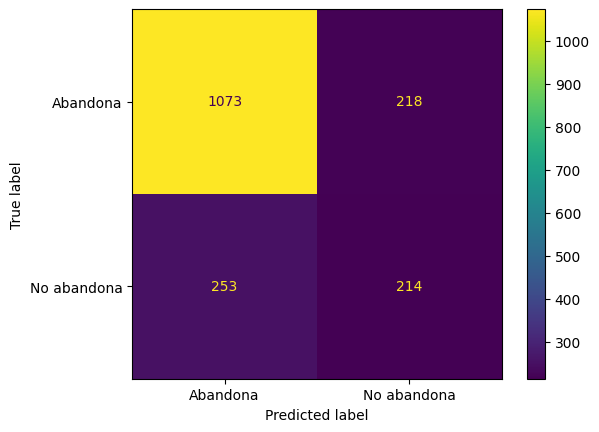

In [128]:
matriz_confusion_knn = confusion_matrix(y_val, y_previsto_knn)
visualizacion_knn = ConfusionMatrixDisplay(confusion_matrix= matriz_confusion_knn,
                                      display_labels = ['Abandona', 'No abandona'])
visualizacion_knn.plot();

In [125]:
print("Modelo Árbol de decisión")
print(f'La exactitud (accuracy) del modelo es: {accuracy_score(y_val,y_previsto_arbol)}')
print(f'La precisión del modelo es: {precision_score(y_val,y_previsto_arbol)}')
print(f'La sensibilidad (recall) del modelo es: {recall_score(y_val,y_previsto_arbol)}')
print(f'El f1-score del modelo es: {f1_score(y_val,y_previsto_arbol)}')

Modelo Árbol de decisión
La exactitud (accuracy) del modelo es: 0.7736063708759955
La precisión del modelo es: 0.5748373101952278
La sensibilidad (recall) del modelo es: 0.5674518201284796
El f1-score del modelo es: 0.5711206896551724


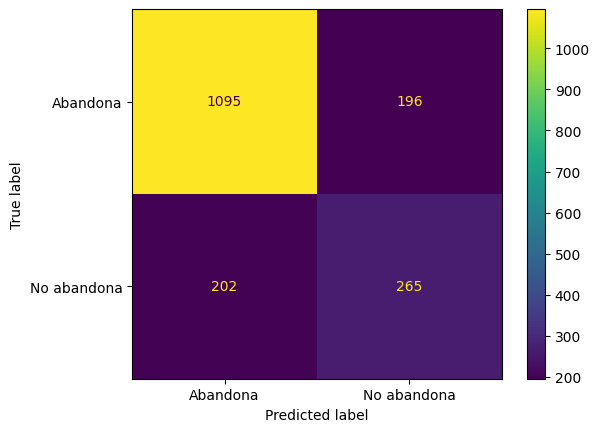

In [129]:
matriz_confusion_arbol = confusion_matrix(y_val, y_previsto_arbol)
visualizacion_arbol = ConfusionMatrixDisplay(confusion_matrix= matriz_confusion_arbol,
                                      display_labels = ['Abandona', 'No abandona'])
visualizacion_arbol.plot();

In [131]:
print("Modelo Random Forest")
print(f'La exactitud (accuracy) del modelo es: {accuracy_score(y_val,y_previsto_rf)}')
print(f'La precisión del modelo es: {precision_score(y_val,y_previsto_rf)}')
print(f'La sensibilidad (recall) del modelo es: {recall_score(y_val,y_previsto_rf)}')
print(f'El f1-score del modelo es: {f1_score(y_val,y_previsto_rf)}\n')

Modelo Random Forest
La exactitud (accuracy) del modelo es: 0.8145620022753128
La precisión del modelo es: 0.6821705426356589
La sensibilidad (recall) del modelo es: 0.5653104925053534
El f1-score del modelo es: 0.6182669789227166



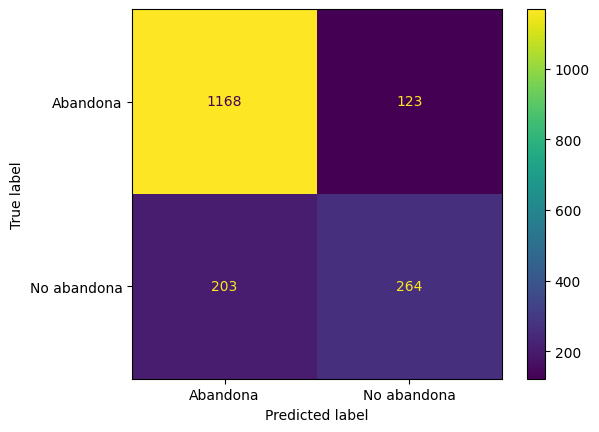

In [130]:
matriz_confusion_rf = confusion_matrix(y_val, y_previsto_rf)
visualizacion_rf = ConfusionMatrixDisplay(confusion_matrix= matriz_confusion_rf,
                                      display_labels = ['Abandona', 'No abandona'])
visualizacion_rf.plot();

##Análisis de la Importancia de las Variables

In [137]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

KNN

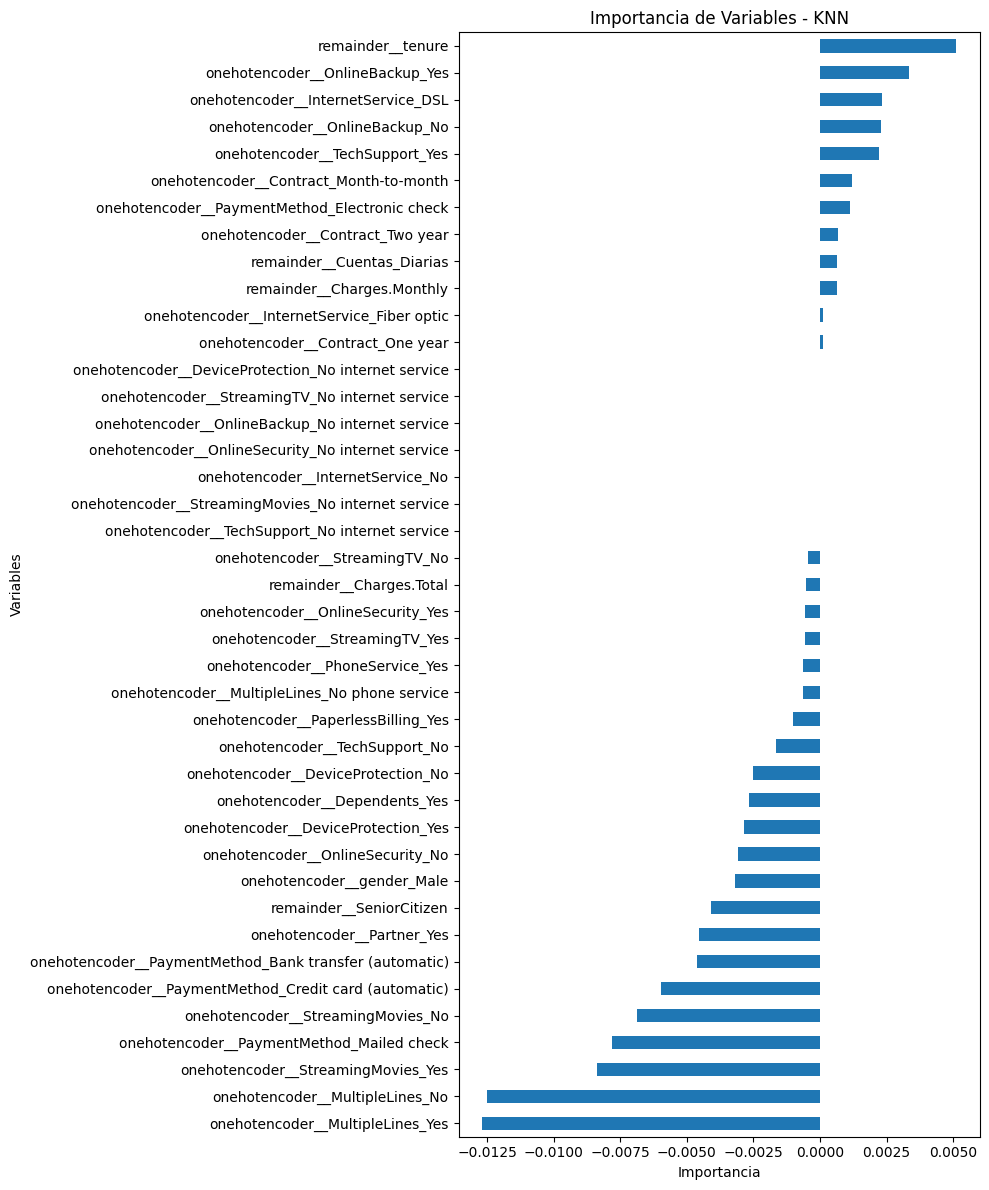

In [140]:
result_knn = permutation_importance(modelo_knn, X_val_normalizado, y_val_normalizado, n_repeats=10, random_state=15)
importances_knn = pd.Series(result_knn.importances_mean, index=one_hot.get_feature_names_out(columns))

plt.figure(figsize=(10, 12))  # Ajusta el tamaño: ancho x alto
importances_knn.sort_values().plot(kind='barh')
plt.title('Importancia de Variables - KNN')
plt.xlabel('Importancia')
plt.ylabel('Variables')
plt.tight_layout()  # Ajusta automáticamente los márgenes
plt.show()

Árbol de decisión

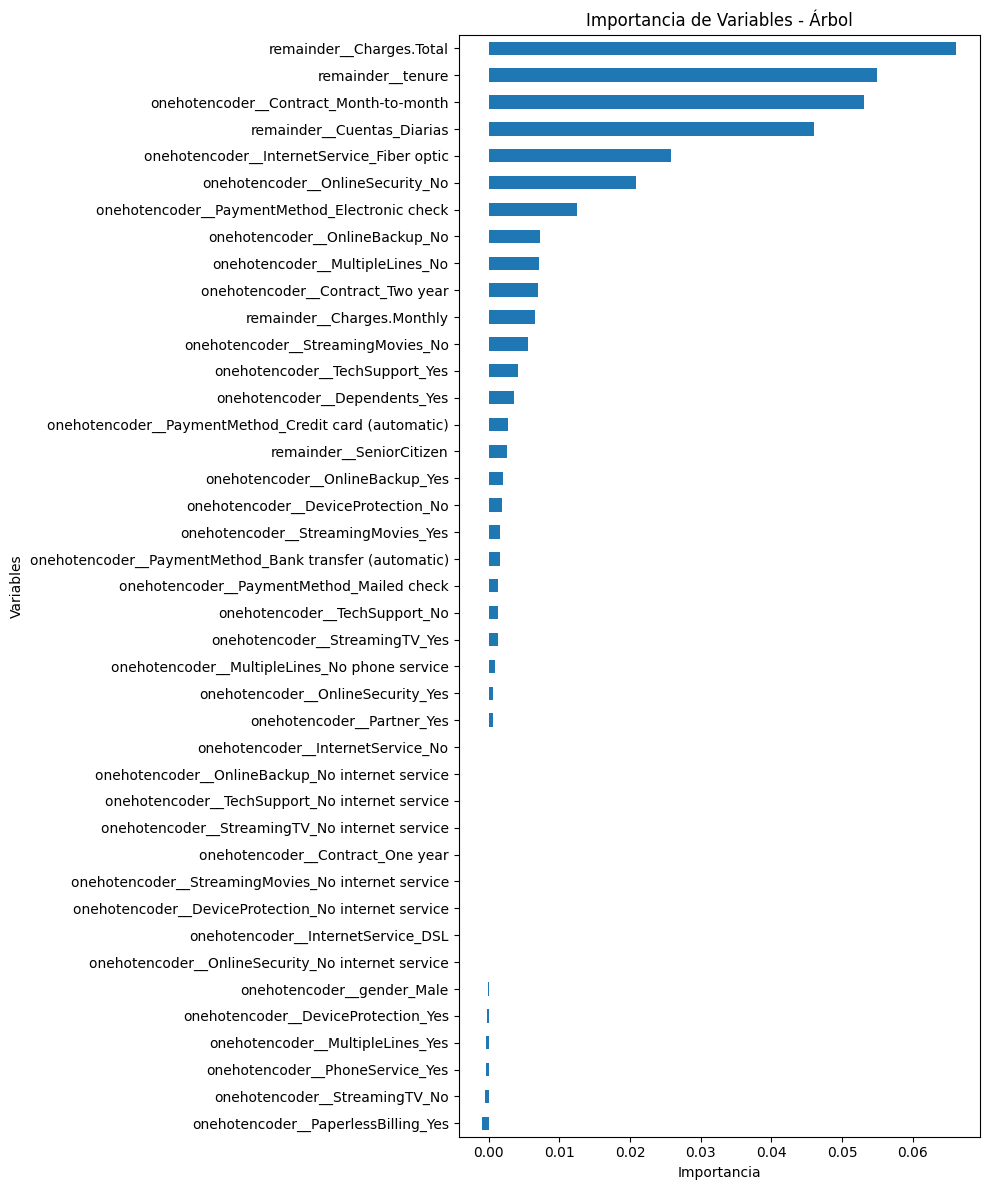

In [139]:
result_arbol = permutation_importance(modelo_arbol, X_val, y_val, n_repeats=10, random_state=15)
importances_arbol = pd.Series(result_arbol.importances_mean, index=one_hot.get_feature_names_out(columns))

plt.figure(figsize=(10, 12))  # Ajusta el tamaño: ancho x alto
importances_arbol.sort_values().plot(kind='barh')
plt.title('Importancia de Variables - Árbol de decisión')
plt.xlabel('Importancia')
plt.ylabel('Variables')
plt.tight_layout()  # Ajusta automáticamente los márgenes
plt.show()

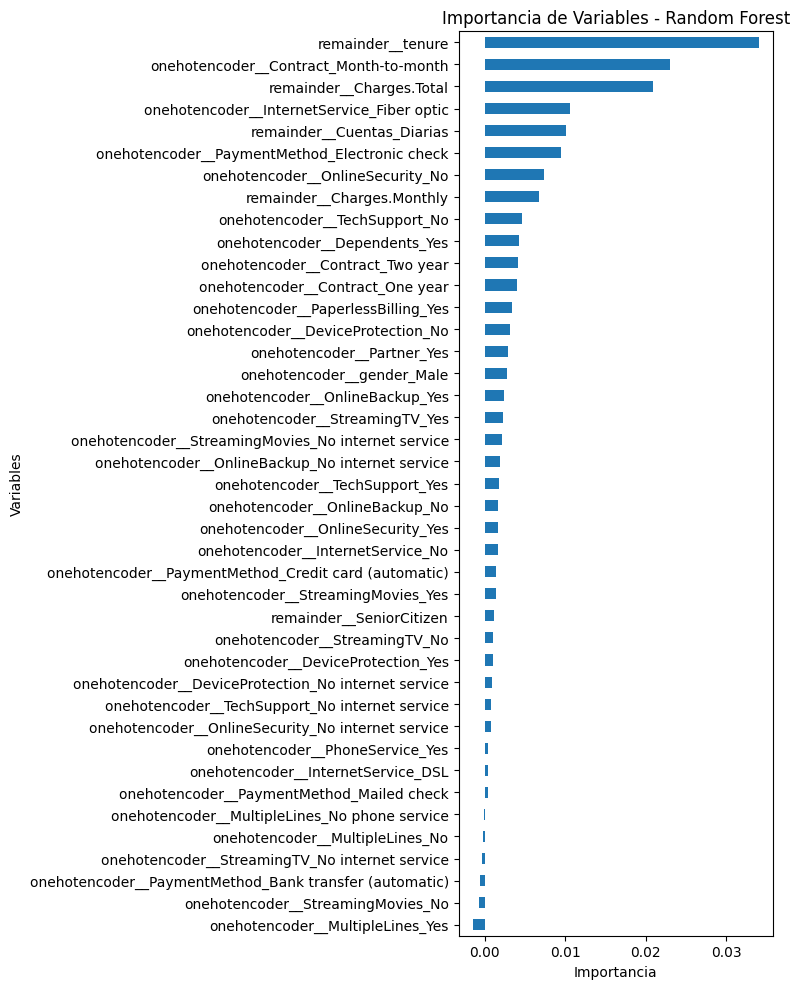

In [142]:
result_rf = permutation_importance(modelo_rf, X_val, y_val, n_repeats=10, random_state=15)
importances_rf = pd.Series(result_rf.importances_mean, index=one_hot.get_feature_names_out(columns))

plt.figure(figsize=(8, 10))  # Ajusta el tamaño: ancho x alto
importances_rf.sort_values().plot(kind='barh')
plt.title('Importancia de Variables - Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Variables')
plt.tight_layout()  # Ajusta automáticamente los márgenes
plt.show()

#Interpretación y Conclusiones


*   El modelo con mejor desempeño es el de random forest:
  * Con una exactitud de 0.81, superando a KNN con 0.73 y Árbol de decisión 0.77.
  * Con una precisión de 0.68, superando a KNN con 0.49 y Árbol de decisión 0.57.
  * Con una sensibilidad de 0.56, superando a KNN con 0.45 e igualando al Árbol de decisión 0.56.
  * Con un f1-score de 0.61, superando a KNN con 0.47 y Árbol de decisión 0.57.
*   En la evaluación de las variables Tenure, Contrato mes a mes y Cargo total son las que más contribuyen a la reducción de la impureza durante las divisiones de los árboles y las Múltiples líneas con servicio de telefonía menos aporte tiene